In [1]:
# Import libraries
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
df = pd.read_csv('NGSIM_US101.csv')

In [3]:
df.head()

,Unnamed: 0,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceding,Following,Space_Headway,Time_Headway,Congestion
0,0,515,2330.0,1123.0,1.118848e+12,30.034,188.062,6451203.729,1873252.549,13.0,6.9,2.0,23.31,2.05,3.0,500.0,523.0,119.10,5.11,0
1,1,515,2330.0,1123.0,1.118848e+12,30.034,188.062,6451203.729,1873252.549,13.0,6.9,2.0,23.31,2.05,3.0,500.0,523.0,119.10,5.11,0
2,3,2127,6459.0,567.0,1.118848e+12,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,2.0,37.52,11.20,2.0,2124.0,2132.0,48.92,1.30,0
3,4,1033,4827.0,592.0,1.118848e+12,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,2.0,41.99,0.10,1.0,1029.0,1040.0,38.81,0.92,0
4,5,1033,4827.0,592.0,1.118848e+12,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,2.0,41.99,0.10,1.0,1029.0,1040.0,38.81,0.92,0


In [4]:
df.columns

Index(['Unnamed: 0', 'Vehicle_ID', 'Frame_ID', 'Total_Frames', 'Global_Time',
       'Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Width',
       'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'Preceding', 'Following',
       'Space_Headway', 'Time_Headway', 'Congestion'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.duplicated().sum()

72064

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455846 entries, 0 to 527909
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Vehicle_ID     455846 non-null  int64  
 1   Frame_ID       455846 non-null  float64
 2   Total_Frames   455846 non-null  float64
 3   Global_Time    455846 non-null  float64
 4   Local_X        455846 non-null  float64
 5   Local_Y        455846 non-null  float64
 6   Global_X       455846 non-null  float64
 7   Global_Y       455846 non-null  float64
 8   v_length       455846 non-null  float64
 9   v_Width        455846 non-null  float64
 10  v_Class        455846 non-null  float64
 11  v_Vel          455846 non-null  float64
 12  v_Acc          455846 non-null  float64
 13  Lane_ID        455846 non-null  float64
 14  Preceding      455846 non-null  float64
 15  Following      455846 non-null  float64
 16  Space_Headway  455846 non-null  float64
 17  Time_Headway   455846 non-nul

# Exploratory Data Analysis

#### Handling Data Columns
Most of the columns contain data: 
- are not necessary for prediction  
- would create a bias in our prediction model
- would make it impossible to use the model in real time

#### Data Categories
Plotting graphs or counting categories in various columns to see the distribution of the data

#### Graphs
- Plotting graphs to see the behaviour of the data by time (Time Series).
- Correlation heat map to see the correlation between the variables

In [9]:
df.drop(['Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'Vehicle_ID', 'Frame_ID', 'Total_Frames',
        'Preceding', 'Following', 'Space_Headway', 'Time_Headway'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
df.head()

,Global_Time,v_length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Congestion
0,1.118848e+12,13.0,6.9,2.0,23.31,2.05,3.0,0
1,1.118848e+12,13.5,6.9,2.0,37.52,11.20,2.0,0
2,1.118848e+12,13.5,4.4,2.0,41.99,0.10,1.0,0
3,1.118850e+12,24.0,8.5,3.0,45.12,-0.55,5.0,0
4,1.118848e+12,15.0,5.9,2.0,24.54,-0.04,3.0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455846 entries, 0 to 455845
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Global_Time  455846 non-null  float64
 1   v_length     455846 non-null  float64
 2   v_Width      455846 non-null  float64
 3   v_Class      455846 non-null  float64
 4   v_Vel        455846 non-null  float64
 5   v_Acc        455846 non-null  float64
 6   Lane_ID      455846 non-null  float64
 7   Congestion   455846 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 27.8 MB


In [12]:
# Convert data types
df['Global_Time'] = pd.to_datetime(df['Global_Time'], unit='ms').dt.tz_localize('GMT').dt.tz_convert('US/Pacific')

In [13]:
df.head()

,Global_Time,v_length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Congestion
0,2005-06-15 08:07:55-07:00,13.0,6.9,2.0,23.31,2.05,3.0,0
1,2005-06-15 08:00:24.800000-07:00,13.5,6.9,2.0,37.52,11.20,2.0,0
2,2005-06-15 08:12:04.700000-07:00,13.5,4.4,2.0,41.99,0.10,1.0,0
3,2005-06-15 08:34:32.700000-07:00,24.0,8.5,3.0,45.12,-0.55,5.0,0
4,2005-06-15 08:09:41.200000-07:00,15.0,5.9,2.0,24.54,-0.04,3.0,1


In [14]:
# Extract time features
df['Time_Hour'] = df['Global_Time'].dt.hour
df['Time_Minute'] = df['Global_Time'].dt.minute
df['Time_Second'] = df['Global_Time'].dt.second
df['Time'] = df['Global_Time'].dt.time

In [15]:
df.head()

,Global_Time,v_length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Congestion,Time_Hour,Time_Minute,Time_Second,Time
0,2005-06-15 08:07:55-07:00,13.0,6.9,2.0,23.31,2.05,3.0,0,8,7,55,08:07:55
1,2005-06-15 08:00:24.800000-07:00,13.5,6.9,2.0,37.52,11.20,2.0,0,8,0,24,08:00:24.800000
2,2005-06-15 08:12:04.700000-07:00,13.5,4.4,2.0,41.99,0.10,1.0,0,8,12,4,08:12:04.700000
3,2005-06-15 08:34:32.700000-07:00,24.0,8.5,3.0,45.12,-0.55,5.0,0,8,34,32,08:34:32.700000
4,2005-06-15 08:09:41.200000-07:00,15.0,5.9,2.0,24.54,-0.04,3.0,1,8,9,41,08:09:41.200000


In [16]:
df.describe()

,v_length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Congestion,Time_Hour,Time_Minute,Time_Second
count,455846.000000,455846.000000,455846.000000,455846.000000,455846.000000,455846.000000,455846.000000,455846.000000,455846.000000,455846.000000
mean,15.309449,6.296412,2.016080,30.119328,0.159670,2.991453,0.392236,7.833319,24.158093,29.414658
std,4.488224,0.892994,0.162736,14.070791,4.550935,1.459117,0.488249,0.372691,16.528372,17.309386
min,4.000000,2.000000,1.000000,0.000000,-11.200000,1.000000,0.000000,7.000000,0.000000,0.000000
25%,13.500000,5.900000,2.000000,20.000000,-0.770000,2.000000,0.000000,8.000000,11.000000,14.000000
50%,15.000000,6.400000,2.000000,30.240000,0.000000,3.000000,0.000000,8.000000,22.000000,29.000000
75%,16.000000,6.900000,2.000000,39.990000,1.380000,4.000000,1.000000,8.000000,32.000000,44.000000
max,76.100000,8.500000,3.000000,95.300000,11.200000,8.000000,1.000000,8.000000,59.000000,59.000000


In [17]:
# Check the most and least vehicle lengths in the data
df.v_length.value_counts().sort_values()

47.0       42
39.0       42
61.5       42
54.5       46
65.0       47
        ...  
16.0    37600
14.0    41390
15.5    47361
14.5    51479
15.0    52482
Name: v_length, Length: 97, dtype: int64

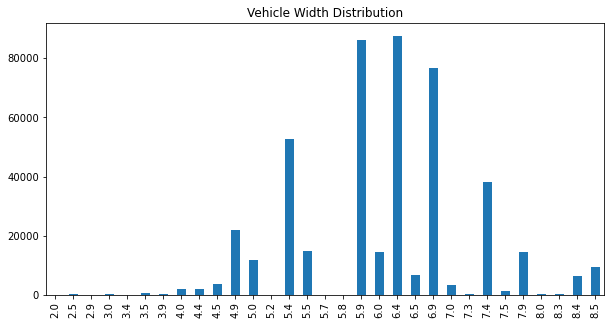

In [18]:
# Distribution of vehicle widths in the data
ax = df.v_Width.value_counts().sort_index().plot(kind='bar', figsize=(10,5), title='Vehicle Width Distribution')

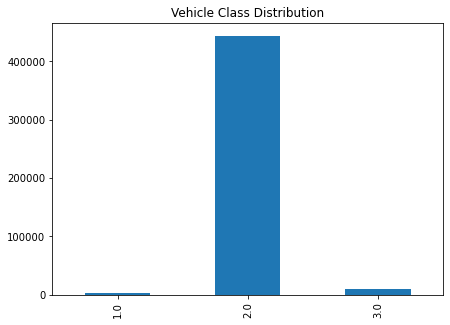

In [19]:
# Graph to show v_Class distribution
ax = df.v_Class.value_counts().sort_index().plot(kind='bar', figsize=(7,5), title='Vehicle Class Distribution')

In [20]:
# The number of vehicles that used each lane
df.Lane_ID.value_counts()

2.0    94821
1.0    93273
3.0    89603
4.0    88966
5.0    81591
6.0     5614
7.0     1409
8.0      569
Name: Lane_ID, dtype: int64

In [21]:
speed_columns = ['v_Vel', 'v_Acc']

<Figure size 432x288 with 0 Axes>

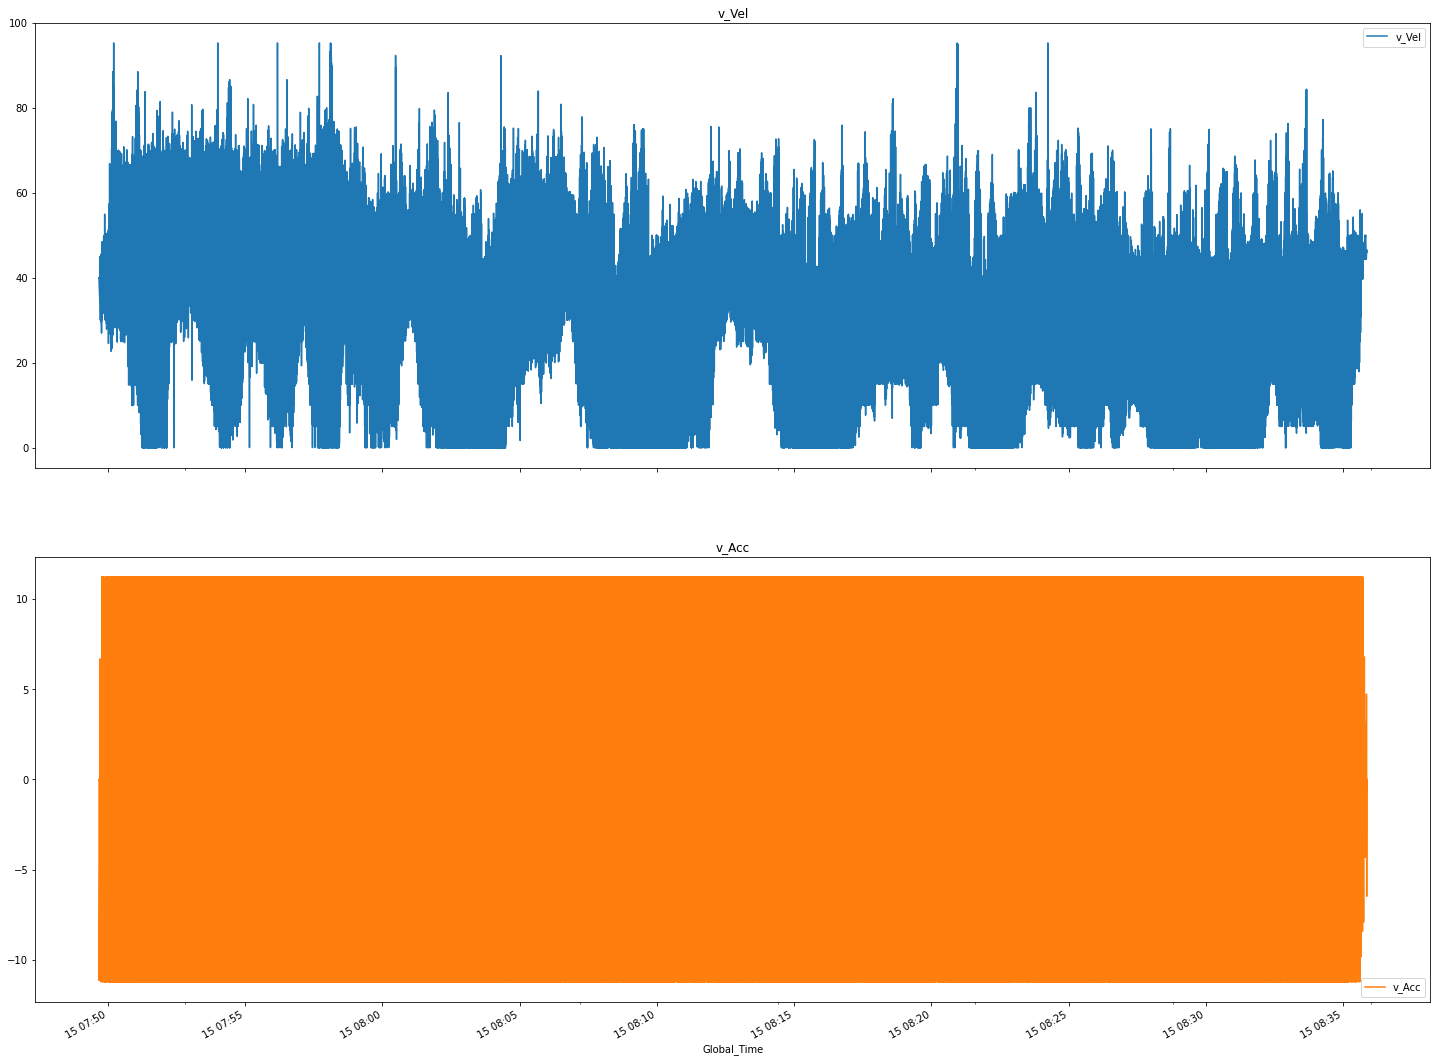

In [22]:
# Time series to show the behaviour of the vehicles velocity and acceleration over time
plt.figure()
ax = df.plot(x='Global_Time', y=speed_columns, kind='line', figsize=(25, 20), subplots=True,
                title=speed_columns)

<AxesSubplot:>

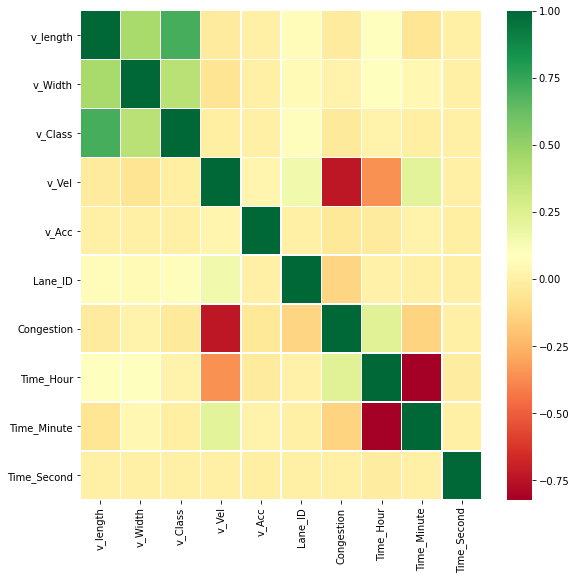

In [23]:
# Heatmap to show the correlation between the variables
corr = df.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr, linewidth=0.5, cmap='RdYlGn')

From the heatmap we can tell the following:
- Strong correlation between the hour and minute
- Strong correlation between congestion and the vehicles velocity
- Low correlations between the hour, minute, lane and the vehicles velocity

Could the hour, minute, lane influence the vehicles velocity and correlation?

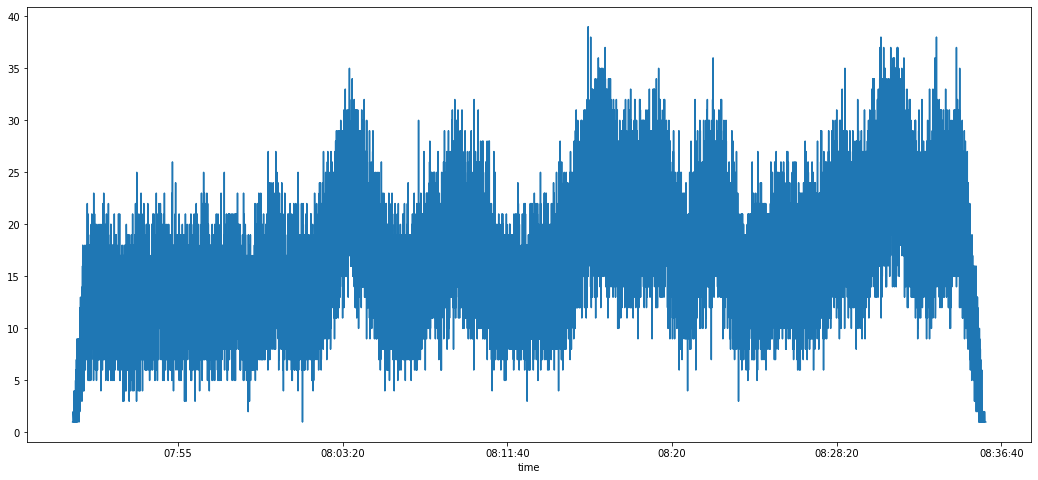

In [24]:
ax = df.Time.value_counts().sort_index().plot(kind='line', figsize=(18,8))